
Aperçu des données:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Informations sur les données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB

Statistiques descriptives:
       total_bill         tip        size
count  244.000000 

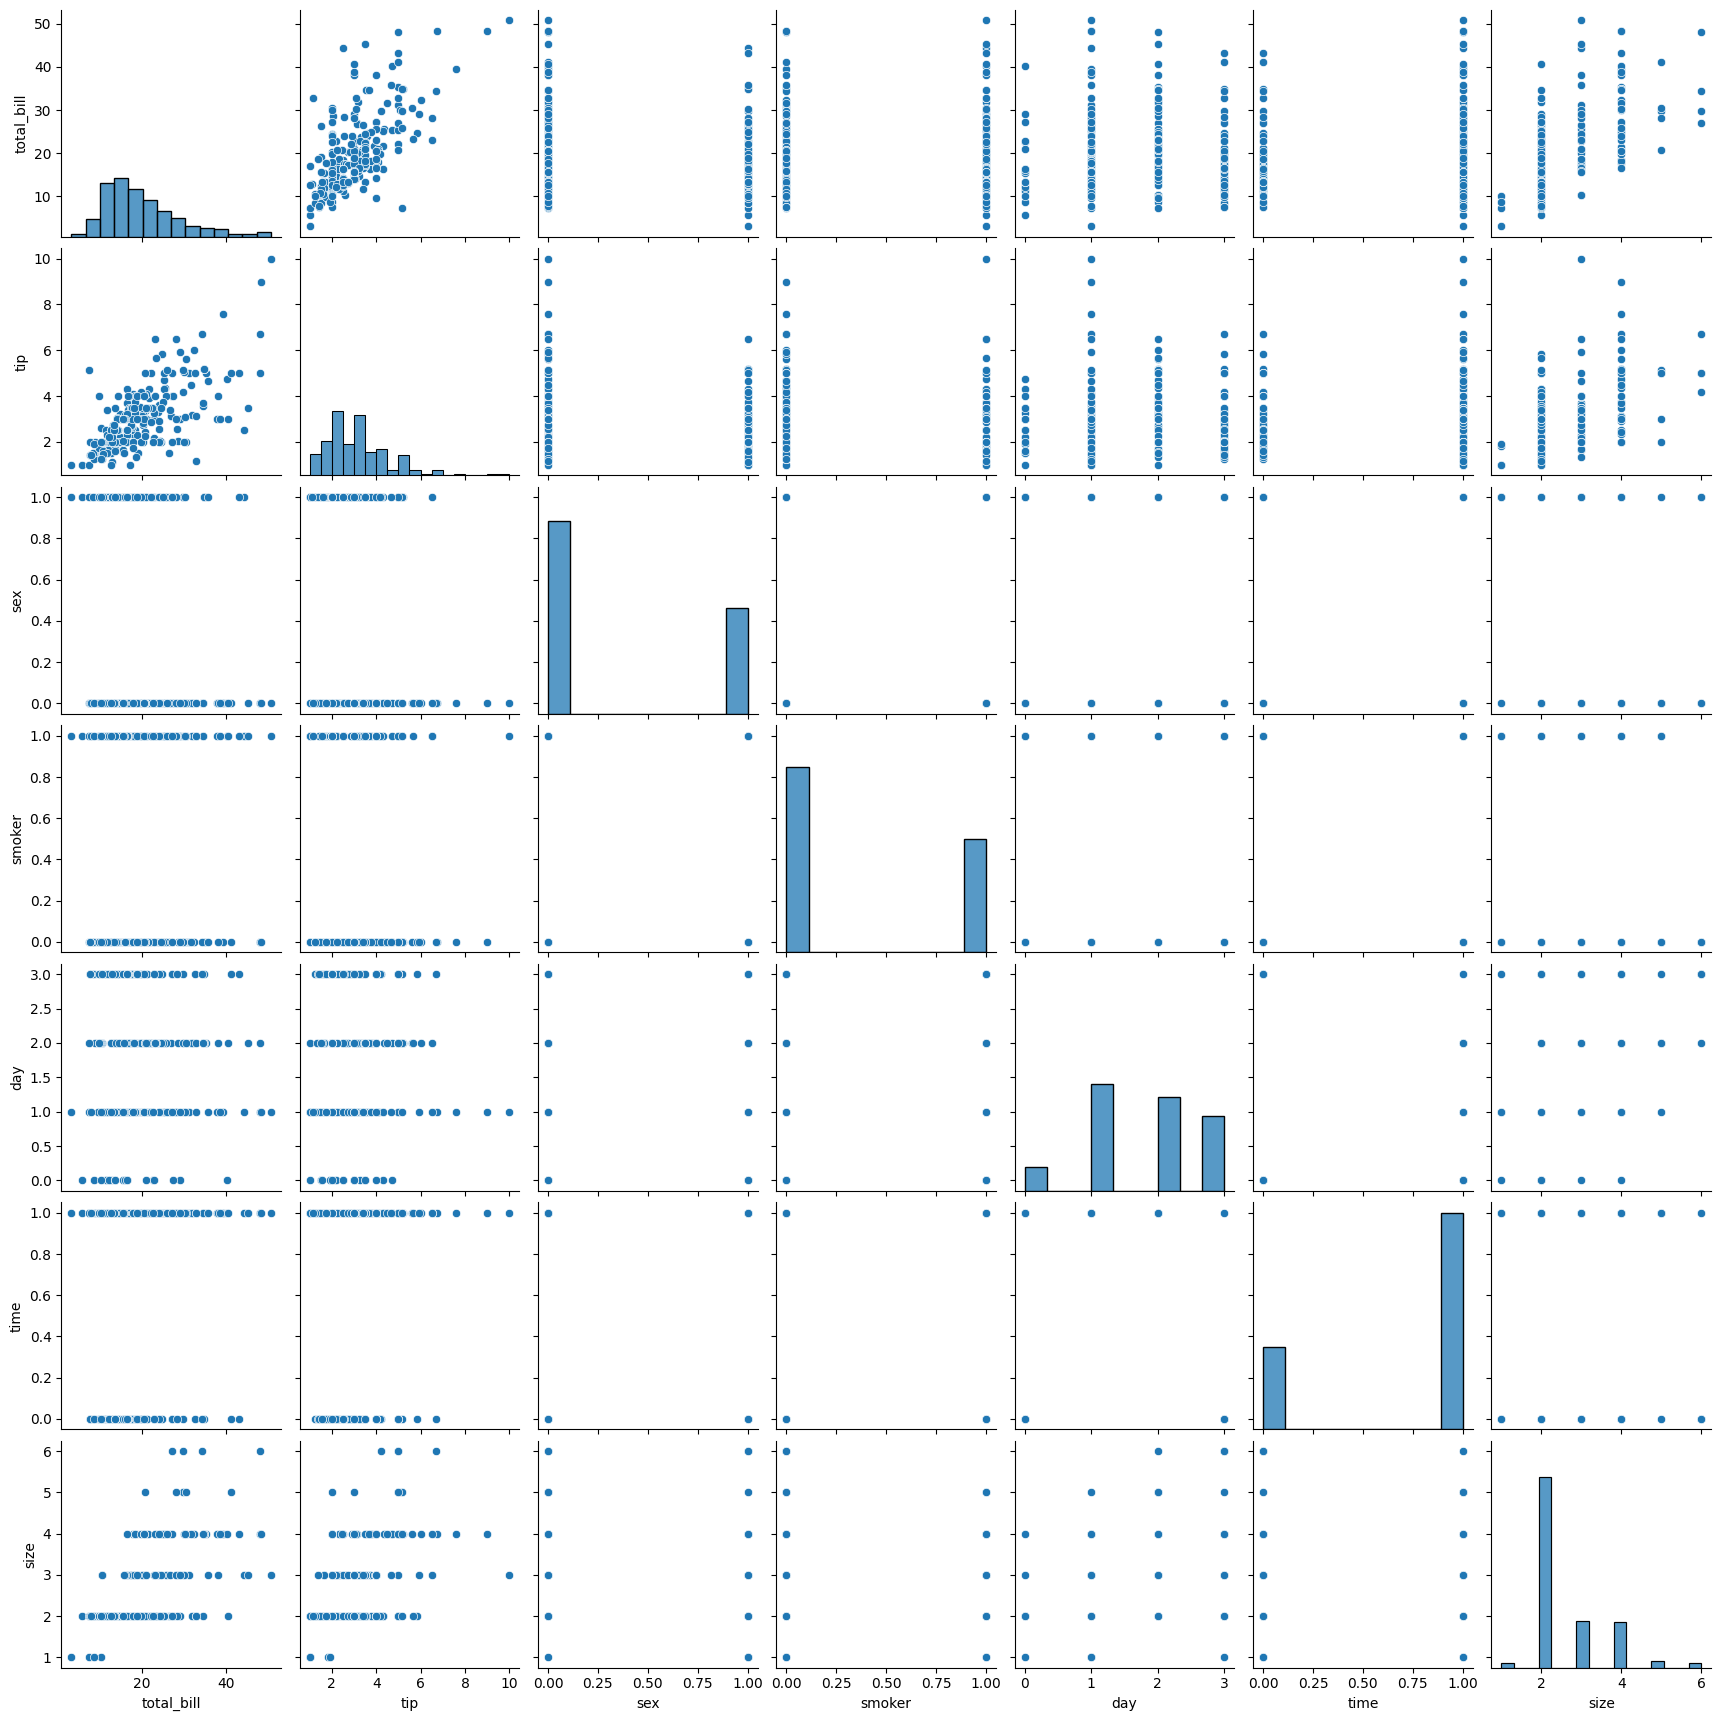

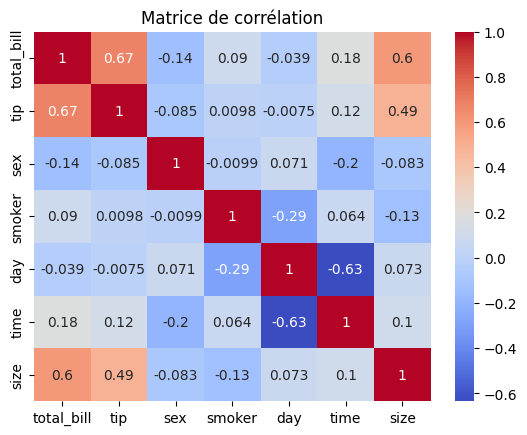

Best Model: Random Forest
                                MSE       MAE        R2
Linear Regression          1.165063  0.816925  0.439976
Ridge Regression           1.163879  0.816575  0.440545
Lasso Regression           1.180751  0.825291  0.432436
ElasticNet                 1.158929  0.814038  0.442925
Decision Tree              1.567610  0.923699  0.246480
Random Forest              1.129919  0.829837  0.456870
Support Vector Regression  1.336372  0.808280  0.357632
KNN Regressor              1.455022  0.890164  0.300599


In [1]:
# Machine Learning Project - Regression Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Dataset Selection and Import
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
df = pd.read_csv(url)

# Data Overview
print("\nAperçu des données:")
print(df.head())
print("\nInformations sur les données:")
df.info()
print("\nStatistiques descriptives:")
print(df.describe())

# Step 2: Data Cleaning and Preparation
print("\nVérification des valeurs manquantes:")
print(df.isnull().sum())
df.drop_duplicates(inplace=True)
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})
df['day'] = df['day'].astype('category').cat.codes
df['time'] = df['time'].map({'Lunch': 0, 'Dinner': 1})

# Visualization and Exploration
sns.pairplot(df)
plt.show()
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

# Step 3: Feature Selection
X = df.drop('tip', axis=1)
y = df['tip']

# Step 4: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Model Training
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'KNN Regressor': KNeighborsRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

results_df = pd.DataFrame(results).T
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
joblib.dump(best_model, 'best_model.pkl')

print("Best Model:", best_model_name)
print(results_df)
